<a href="https://colab.research.google.com/github/sas4wy/assignment3/blob/main/Copy_of_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [ ]:
! git clone https://www.github.com/sas4wy/assignment3

fatal: destination path 'assignment3' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('./assignment3/data/car_data.csv')

In [ ]:
print(df.head(),'\n')
print(df.describe(), '\n')

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0 

           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000 



In [ ]:
df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [ ]:
df['gender_dummy'] = 0
df.loc[ df['Gender']== 'Female', 'gender_dummy'] = 1
df['gender_dummy'].value_counts()

1    516
0    484
Name: gender_dummy, dtype: int64

In [ ]:
df['gender_dummy'].value_counts()

1    516
0    484
Name: gender_dummy, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
x = df.loc[:,['Age','AnnualSalary']]
y = df['Purchased']

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
x = x.apply(maxmin)
x.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)

In [ ]:
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(x_train,y_train)
    y_hat = fitted_model.predict(x_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

[ 8 10 14]


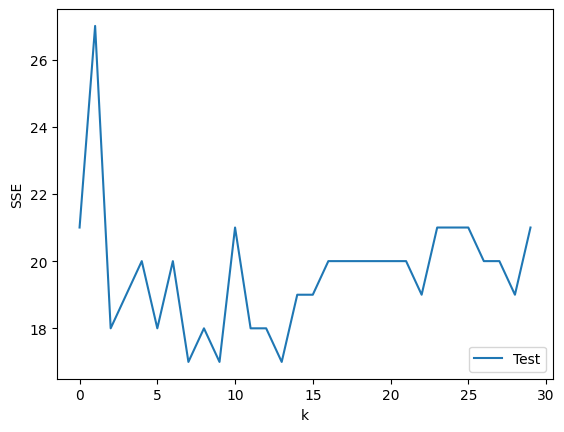

In [ ]:
plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

In [ ]:
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(x_train,y_train)
y_hat = fitted_model.predict(x_test)
pd.crosstab(y_test, y_hat)


col_0,0,1
Purchased,,
0,104,15
1,3,78


In [ ]:
from sklearn.model_selection import train_test_split

vars = ['Age','AnnualSalary','Gender']
x = df.loc[:,vars]
y = df['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=1)

model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(x_train.drop('Gender',axis=1),y_train)
y_hat = fitted_model.predict(x_test.drop('Gender',axis=1))


y_hat_M = y_hat[ x_test['Gender'] == 'Male']
y_hat_F = y_hat[ x_test['Gender'] == 'Female']
y_M = y_test[ x_test['Gender'] == 'Male']
y_F = y_test[ x_test['Gender'] == 'Female']
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,56,6
1,12,35


In [ ]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,58,5
1,10,18


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".) **With a lower value of k (i.e 3), there was much more variance indicating that the model overfit the data, whereas with larger values ( i.e 300 or 100) the model underfit the data and was to simple to get the patterns of the data.**


In [ ]:
df2 = pd.read_csv('./assignment3/data/USA_cars_datasets.csv')

In [ ]:
print(df2.head(),'\n')
print(df2.shape, '\n')


   Unnamed: 0  price      brand    model  year   title_status  mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle   274117   
1           1   2899       ford       se  2011  clean vehicle   190552   
2           2   5350      dodge      mpv  2018  clean vehicle    39590   
3           3  25000       ford     door  2014  clean vehicle    64146   
4           4  27700  chevrolet     1500  2018  clean vehicle     6654   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left   

(2499, 13) 



In [ ]:
list1 = ['Unnamed: 0','brand','title_status','color','vin','lot','state','country','condition']
new_df = df2.drop(list1, axis=1 )

In [ ]:
new_df.head()

,price,model,year,mileage
0,6300,cruiser,2008,274117
1,2899,se,2011,190552
2,5350,mpv,2018,39590
3,25000,door,2014,64146
4,27700,1500,2018,6654


In [ ]:
x = new_df.loc[:,['year','mileage']]
y = new_df['price']

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

x = x.apply(maxmin)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)

In [ ]:
k_values = [3, 10, 50, 100, 300]
sse_values = []
predicted_values = []

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1)
    fitted_model = model.fit(x_train,y_train)
    y_hat = fitted_model.predict(x_test)
    SSE_test[k] = np.sum( (y_test-y_hat)**2 )
    y_hat = fitted_model.predict(x_train)
    SSE_train[k] = np.sum( (y_train-y_hat)**2 )
    SSE_values.append(SSE_train)

In [ ]:
plt.figure
plt.xlabel('True Test Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('True vs. Predicted Values')
plt.show()

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [ ]:
df = pd.read_csv('./assignment3/data/airbnb_hw.csv')

In [ ]:
from sklearn.cluster import KMeans
columns_to_normalize = ['Price', 'Beds', 'Number of Reviews', 'Review Scores Rating']
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x


X = gdf.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

In [ ]:
initial_centroids = np.random.randint(low=1,high=24,size=3)
model = KMeans(n_clusters=2, n_init=10, random_state=0)
model = model.fit(X)
gdf['g_hat'] = model.predict(X)

centers = model.cluster_centers_
min_x1 = min(gdf.loc[:,'x1'])
diff_x1 = max(gdf.loc[:,'x1'])-min_x1
min_x2 = min(gdf.loc[:,'x2'])
diff_x2 = max(gdf.loc[:,'x2'])-min_x2 - min(gdf.loc[:,'x2'])
this_plot = sns.scatterplot(data=gdf,x='x1',y='x2',hue='g_hat',style='g_hat').set_title('k=2, too few')
plt.scatter( centers[:,0]*diff_x1+min_x1, centers[:,1]*diff_x2+min_x2, color='r')

In [ ]:


def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = gdf.loc[ : , ['x1','x2','x3'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?

In [ ]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test